# TSF_INTERN at The Sparks Foundation

# Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

### ● As a business manager, try to find out the weak areas where you can work to make more profit.
### ● What all business problems you can derive by exploring the data? 


### importing required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print("successfully installed")

successfully installed


## loading dataset

In [2]:
df = pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.drop("Postal Code", axis = 1, inplace = True)
df.head() # as we don"t need that column

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.1+ KB


In [5]:
df.shape

(9994, 12)

In [6]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


## Plotinng Discount vs Profit graph

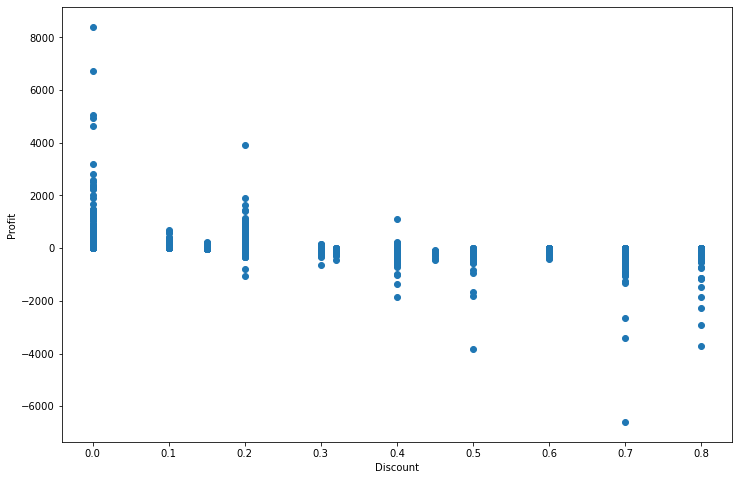

In [7]:
plt.figure(figsize = (12,8))
plt.scatter(df["Discount"], df["Profit"])
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()

### as we can see Profit decreases with increase in Discount



## Ploting Sales vs Profit 

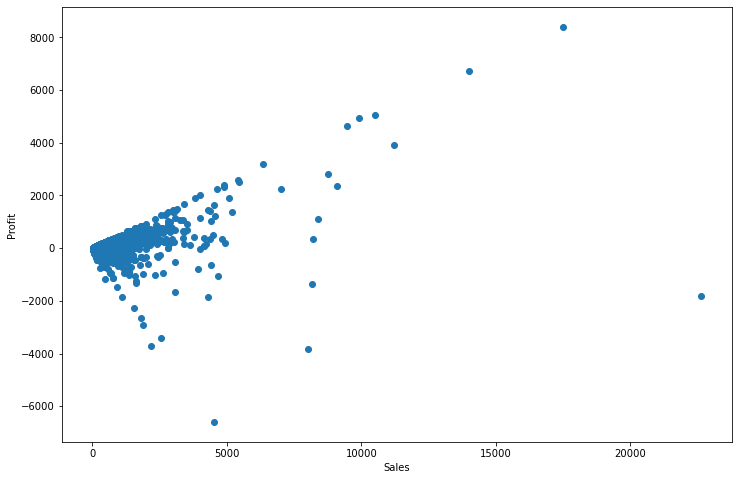

In [8]:
plt.figure(figsize = (12,8))
plt.scatter(df["Sales"], df["Profit"])
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()

### as we guessed Profit gets high withrespect to Sales

In [9]:
kv_pair = dict()
for i in range(9994):
    if df['Sub-Category'][i] in kv_pair:
        kv_pair[df['Sub-Category'][i]] += df['Sales'][i]
    else:
        kv_pair[df['Sub-Category'][i]] = df['Sales'][i]
        
print(kv_pair)

{'Bookcases': 114879.99629999997, 'Chairs': 328449.10300000076, 'Labels': 12486.312, 'Tables': 206965.5320000001, 'Storage': 223843.60800000012, 'Furnishings': 91705.16400000005, 'Art': 27118.791999999954, 'Phones': 330007.0540000001, 'Binders': 203412.7330000001, 'Appliances': 107532.161, 'Paper': 78479.20600000002, 'Accessories': 167380.3180000001, 'Envelopes': 16476.401999999995, 'Fasteners': 3024.2799999999997, 'Supplies': 46673.538000000015, 'Machines': 189238.63099999996, 'Copiers': 149528.02999999994}


In [10]:
x1 = kv_pair.keys()
y1 = kv_pair.values()

## Ploting Sub-Category vs Sales (to find which products had been sold more)

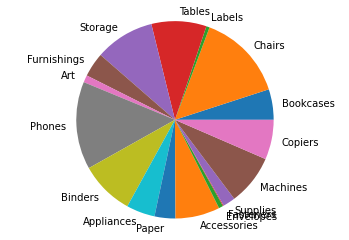

In [11]:
fig1, ax1 = plt.subplots()
ax1.pie(y1, labels=x1, radius=5000)
ax1.axis('equal')
plt.show()

### as we can see Phones, Chairs and some other are sold more 

In [12]:
kv_pair2 = dict()
for i in range(9994):
    if df['Sub-Category'][i] in kv_pair2:
        kv_pair2[df['Sub-Category'][i]] += df['Profit'][i]
    else:
        kv_pair2[df['Sub-Category'][i]] = df['Profit'][i]
        
print(kv_pair2)

{'Bookcases': -3472.5559999999978, 'Chairs': 26590.166300000026, 'Labels': 5546.253999999998, 'Tables': -17725.481100000008, 'Storage': 21278.826399999998, 'Furnishings': 13059.143599999983, 'Art': 6527.786999999998, 'Phones': 44515.7306, 'Binders': 30221.763299999995, 'Appliances': 18138.005399999995, 'Paper': 34053.56929999997, 'Accessories': 41936.63569999993, 'Envelopes': 6964.176700000003, 'Fasteners': 949.5182, 'Supplies': -1189.0994999999984, 'Machines': 3384.756899999999, 'Copiers': 55617.82490000001}


## Products vs Profit (to find which product makes more Profit)

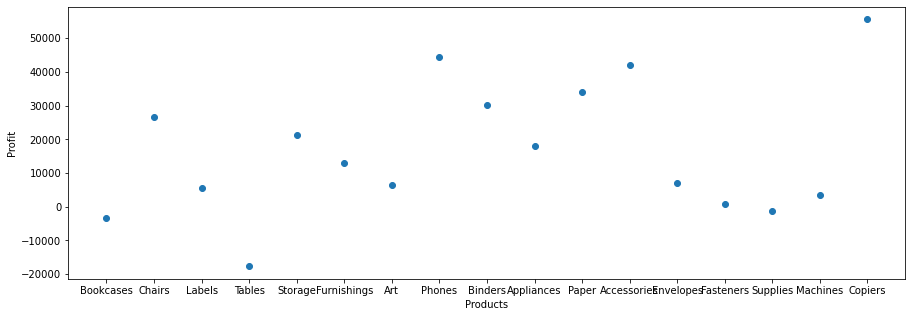

In [13]:
plt.figure(figsize = (15,5))
plt.scatter( kv_pair2.keys(), kv_pair2.values())
plt.xlabel("Products")
plt.ylabel("Profit")
plt.show()

### as the result, Copiers, Phones ana Accessories are making more profit than any other products

In [14]:
kv_pair3 = dict()
for i in range(9994):
    if df['Region'][i] in kv_pair3:
        kv_pair3[df['Region'][i]] += df['Sales'][i]
    else:
        kv_pair3[df['Region'][i]] = df['Sales'][i]
        
print(kv_pair3)

{'South': 391721.9050000003, 'West': 725457.8245000006, 'Central': 501239.8908000005, 'East': 678781.2399999979}


## Region vs Sales (to find where the most products are sold)

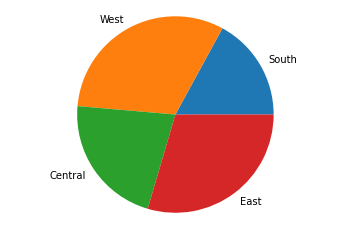

In [15]:
fig2, ax2 = plt.subplots()
ax2.pie(kv_pair3.values(), labels = kv_pair3.keys())
ax2.axis('equal')
plt.show()

### as we can see More Products are sold in West and East region 

In [16]:
kv_pair4 = dict()
for i in range(9994):
    if df['Region'][i] in kv_pair4:
        kv_pair4[df['Region'][i]] += df['Profit'][i]
    else:
        kv_pair4[df['Region'][i]] = df['Profit'][i]
        
print(kv_pair4)

{'South': 46749.430300000065, 'West': 108418.44890000018, 'Central': 39706.36249999998, 'East': 91522.78000000026}


## Region vs Profit (to find where the Profit is more)

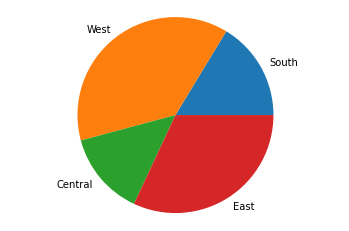

In [17]:
fig3, ax3 = plt.subplots()
ax3.pie(kv_pair4.values(), labels = kv_pair4.keys())
ax3.axis('equal')
plt.show()

### as the graph shows, we are making more profits in west and east regions

In [18]:
kv_pair5 = dict()
for i in range(9994):
    if df['State'][i] in kv_pair5:
        kv_pair5[df['State'][i]] += df['Sales'][i]
    else:
        kv_pair5[df['State'][i]] = df['Sales'][i]
        
print(kv_pair5)

{'Kentucky': 36591.74999999997, 'California': 457687.631500001, 'Florida': 89473.708, 'North Carolina': 55603.16399999997, 'Washington': 138641.26999999993, 'Texas': 170188.04580000005, 'Wisconsin': 32114.61000000002, 'Utah': 11220.055999999999, 'Nebraska': 7464.9299999999985, 'Pennsylvania': 116511.91400000003, 'Illinois': 80166.10099999985, 'Minnesota': 29863.149999999994, 'Michigan': 76269.61400000002, 'Delaware': 27451.068999999992, 'Indiana': 53555.36, 'New York': 310876.2709999998, 'Arizona': 35282.001, 'Virginia': 70636.71999999999, 'Tennessee': 30661.87299999998, 'Alabama': 19510.639999999992, 'South Carolina': 8481.71, 'Oregon': 17431.14999999999, 'Colorado': 32108.118, 'Iowa': 4579.759999999999, 'Ohio': 78258.13599999993, 'Missouri': 22205.149999999998, 'Oklahoma': 19683.39, 'New Mexico': 4783.521999999999, 'Louisiana': 9217.029999999999, 'Connecticut': 13384.356999999996, 'New Jersey': 35764.31200000001, 'Massachusetts': 28634.433999999994, 'Georgia': 49095.840000000004, 'Ne

## States vs Sales (to find where we are selling more products)

In [19]:
x = kv_pair5.values()
y = kv_pair5.keys()

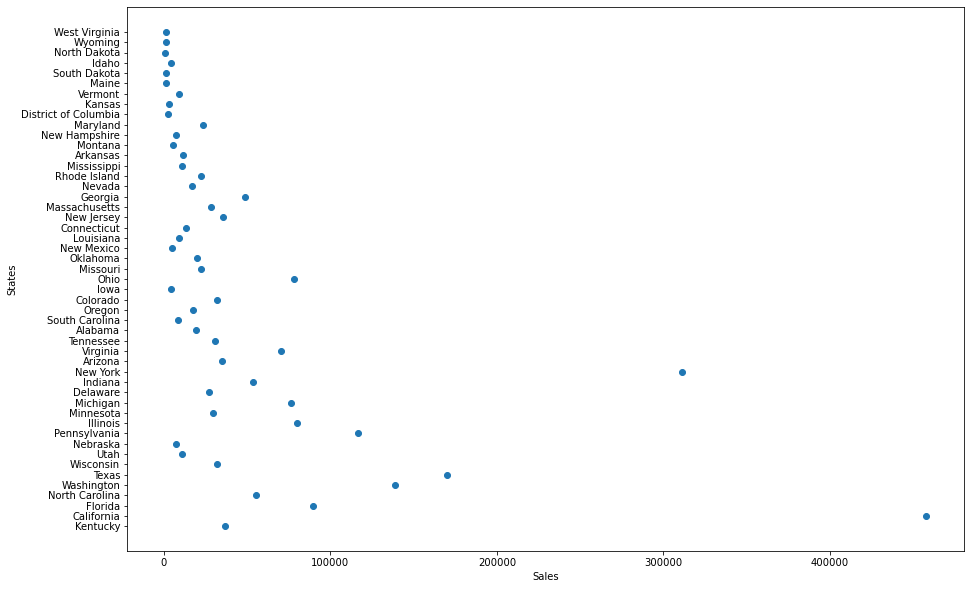

In [20]:
plt.figure(figsize = (15,10))
plt.scatter( x, y)
plt.xlabel("Sales")
plt.ylabel("States")
plt.show()

### we can see that we are selling more Products in California, New york , etc.. 
### and a very few in Nebraska, lowa, etc...

In [21]:
kv_pair6 = dict()
for i in range(9994):
    if df['State'][i] in kv_pair6:
        kv_pair6[df['State'][i]] += df['Profit'][i]
    else:
        kv_pair6[df['State'][i]] = df['Profit'][i]
        
print(kv_pair6)

{'Kentucky': 11199.696600000005, 'California': 76381.38710000017, 'Florida': -3399.3017, 'North Carolina': -7490.912200000003, 'Washington': 33402.651699999995, 'Texas': -25729.3563, 'Wisconsin': 8401.800399999998, 'Utah': 2546.5335000000005, 'Nebraska': 2037.0942000000007, 'Pennsylvania': -15559.960300000013, 'Illinois': -12607.88699999998, 'Minnesota': 10823.1874, 'Michigan': 24463.187599999994, 'Delaware': 9977.374800000001, 'Indiana': 18382.936300000005, 'New York': 74038.54860000005, 'Arizona': -3427.9246000000003, 'Virginia': 18597.9504, 'Tennessee': -5341.6936, 'Alabama': 5786.825299999999, 'South Carolina': 1769.0566000000003, 'Oregon': -1190.4704999999992, 'Colorado': -6527.8579, 'Iowa': 1183.8119000000002, 'Ohio': -16971.376600000018, 'Missouri': 6436.210499999999, 'Oklahoma': 4853.956, 'New Mexico': 1157.1161, 'Louisiana': 2196.102300000001, 'Connecticut': 3511.4918000000002, 'New Jersey': 9772.9138, 'Massachusetts': 6785.501600000005, 'Georgia': 16250.043300000003, 'Nevada'

## States vs Profits

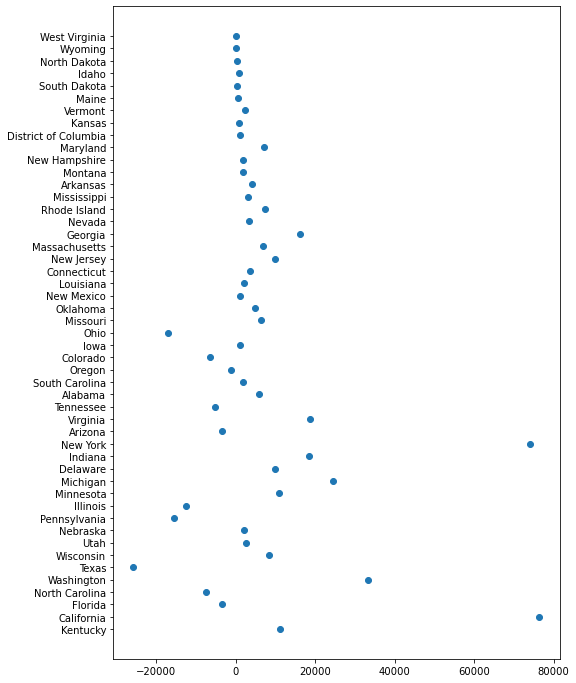

In [23]:
plt.figure(figsize=(8,12))
plt.scatter(kv_pair6.values(), kv_pair6.keys())
plt.show()

### as expected California and Newyork has high Profit rate
### and we can see that, eventhough Texas has high sales rate it has only very poor profit rate

In [90]:
kv_pair7 = dict()
for i in range(9994):
    if df['Segment'][i] in kv_pair7:
        kv_pair7[df['Segment'][i]] += df['Sales'][i]
    else:
        kv_pair7[df['Segment'][i]] = df['Sales'][i]
        
print(kv_pair7)

{'Consumer': 1161401.3449999888, 'Corporate': 706146.3668000001, 'Home Office': 429653.1485000003}


## People category vs Sales (to find who bought more products)

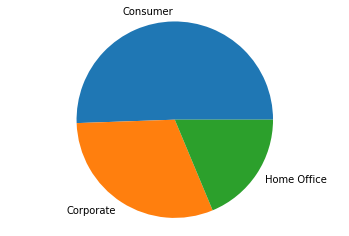

In [91]:
fig4, ax4 = plt.subplots()
ax4.pie(kv_pair7.values(), labels = kv_pair7.keys())
ax4.axis('equal')
plt.show()

### as we can see that Consumers are buying more that Corporates and home office

In [92]:
kv_pair8 = dict()
for i in range(9994):
    if df['Segment'][i] in kv_pair8:
        kv_pair8[df['Segment'][i]] += df['Profit'][i]
    else:
        kv_pair8[df['Segment'][i]] = df['Profit'][i]
        
print(kv_pair8)

{'Consumer': 134119.20919999972, 'Corporate': 91979.13400000021, 'Home Office': 60298.678500000075}


## People category vs Profits 

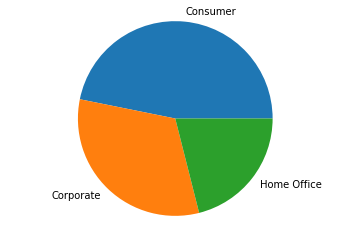

In [93]:
fig5, ax5 = plt.subplots()
ax5.pie(kv_pair8.values(), labels = kv_pair8.keys())
ax5.axis('equal')
plt.show()

### Eventhough corporate has less sales rate, it almost have equal Profit rate as Consumer

In [94]:
df['Country'].unique()

array(['United States'], dtype=object)

# Result :
## we can INCREASE THE PROFIT,
###    - if we increase the sales of Copiers, Accessories and Phones. Ecspeacially eventhough Machines has low sales rate it has very high Profit rate
###    - if we decrease the Discount rate
###    - we should introduce more products in West and East region as it has high sales and profit rates
###    - we can increase the sales in California as it has very high Profit rate
###    - we can concentrate to increase the sales in Corporate as it has High profit rate

In [24]:
# Thank you